## Univariate Histogram for Numerical Variables

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [43]:
# Extract Data
pokemon = pd.read_csv('../../Datasets/pokemon.csv')

pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


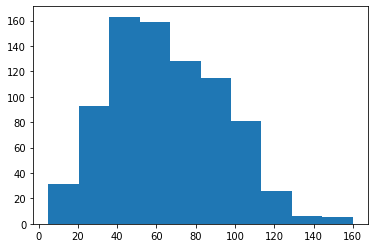

In [69]:
# Plot a Histogram for speed of pokemon
plt.hist(data=pokemon, x='speed');

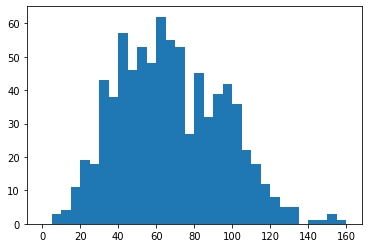

In [70]:
# set up bins
bins = np.arange(0, pokemon.speed.max()+5, 5)
plt.hist(data=pokemon, x='speed', bins=bins);

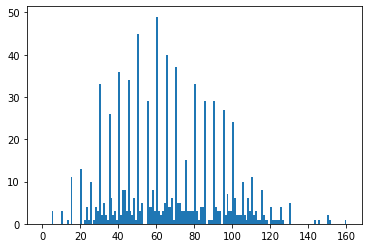

In [46]:
# set up bins
bins = np.arange(0, pokemon.speed.max()+1, 1)
plt.hist(data=pokemon, x='speed', bins=bins);

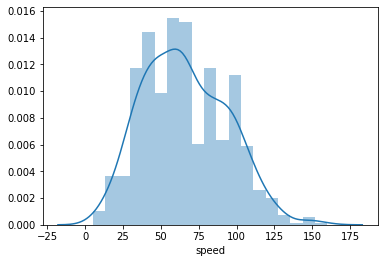

In [47]:
# Histogram Using Seaborn Library
sb.distplot(pokemon['speed'])

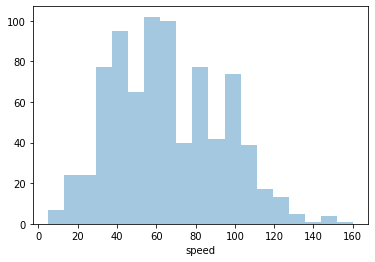

In [48]:
# turning off the density parameter using attribute kde
sb.distplot(pokemon['speed'], kde=False)

**Object Oriented Approach for plotting Histogram**

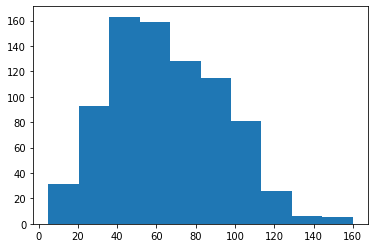

In [49]:
# Using Object Oriented Approch
# 1. Create a figure
# 2. Add an axes to the figure
# 3. Plot the data inside an axes
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=pokemon, x='speed');

**Creating Subplots**

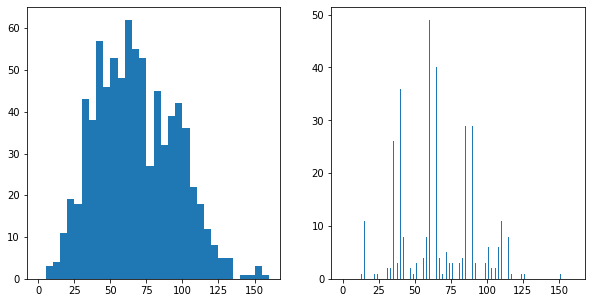

In [62]:
fig = plt.figure(figsize=[10, 5])
ax = fig.add_axes([.125, .125, .775, .755])

plt.subplot(1, 2, 1)

bin_edges = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data=pokemon, x='speed', bins=bin_edges);

plt.subplot(1, 2, 2)

bin_edges = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data=pokemon, x='speed', bins=bin_edges);

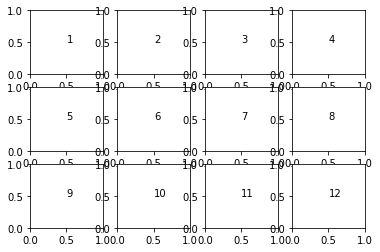

In [68]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector

for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes